In [34]:
import requests
import io
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from io import BytesIO
import base64

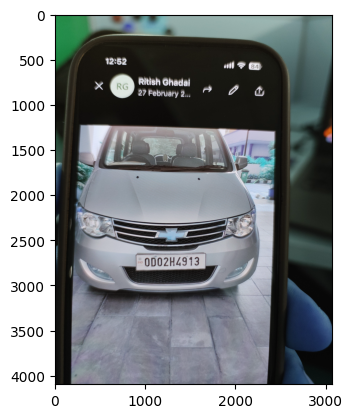

In [41]:
img = cv2.imread(r'C:\Users\sunilswain\Programming\Python\ANPRWeb\image1.png')

plt.imshow(img)

In [22]:

# Set the API endpoint URL
api_url = "http://127.0.0.1:5000/api/extract_plates"

# Set the path to the image you want to rotate
image_path = r"C:\Users\sunilswain\Downloads\vehcle14.jpg"

test_img = cv2.imread(image_path)
# plt.imshow(test_img)
img_data = base64.b64encode(cv2.imencode('.jpg', test_img)[1]).decode('utf-8')
print(type(img_data))
data = {
    'image': img_data
}
headers = {
    'Content-Type': 'application/json'
}
# Make the API request
response = requests.post(api_url, json=data, headers=headers)

<class 'str'>


In [33]:
plates = response.json()['plates']
plate_image = base64.b64decode(plates[0]['plate_image'])

plates[0]['plate_status']

{'Emp_Id': 'SD100', 'Owner_Name': 'Office Car'}

In [7]:
success, encoded_image = cv2.imencode(".png", test_img)
print(type(encoded_image))

# y = encoded_image.tobytes()

# with open('test1.jpg', 'wb') as f:
#     f.write(y)

<class 'numpy.ndarray'>


In [12]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the rotated image bytes from the response
    rotated_image_bytes = response.json()['plates'][0]['plate_image']
    
else:
    # Print the error message if the request was not successful
    print("Error:", response.json()['error'])